<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/SepLeetCodePart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

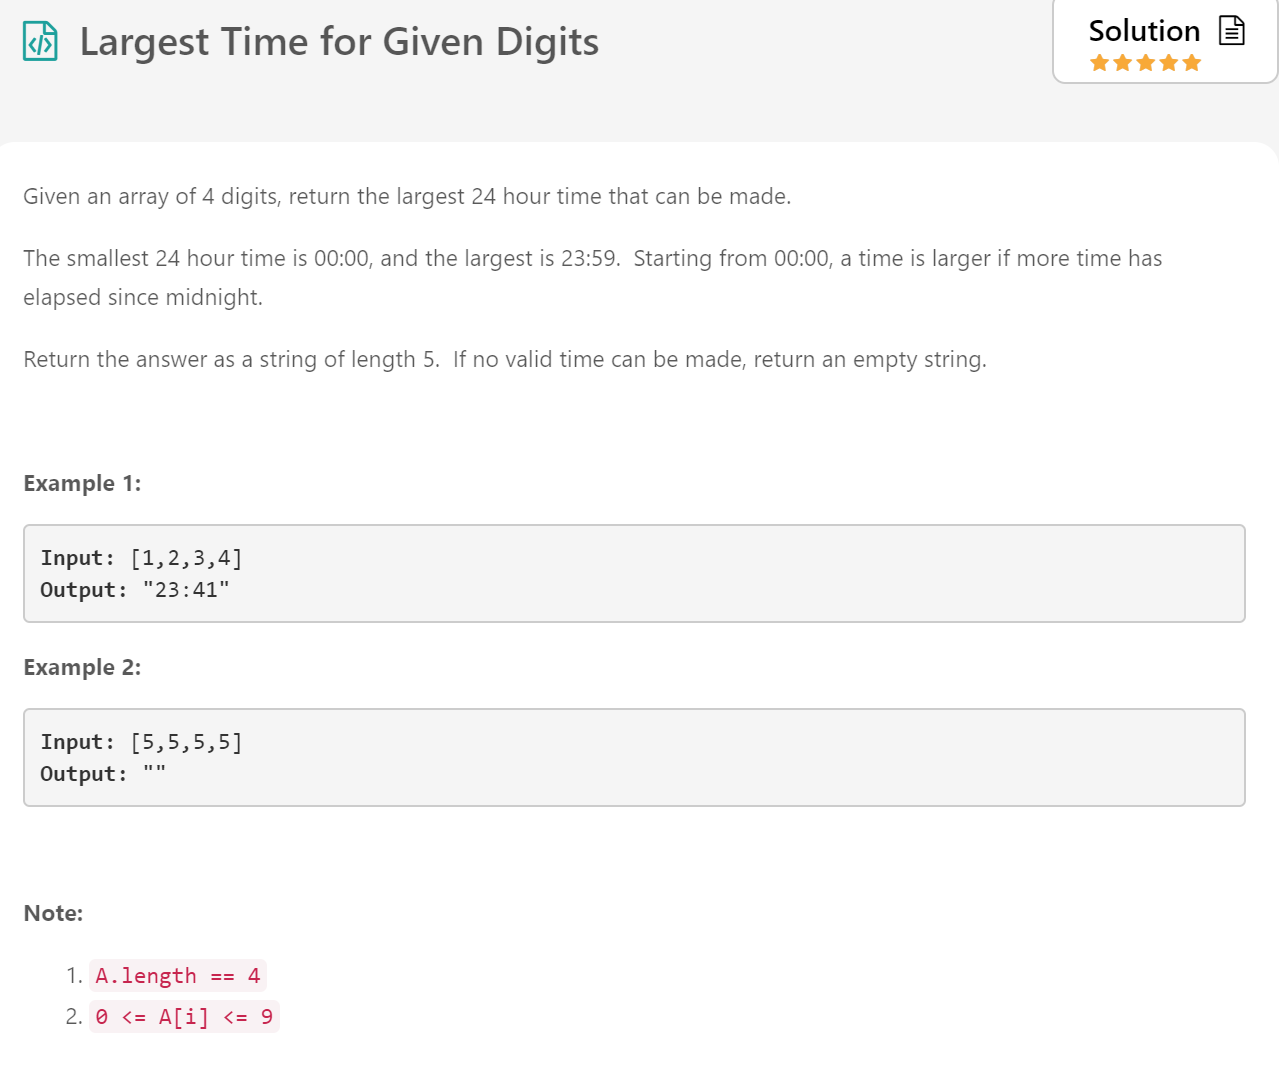

In [ ]:
# Sep 1, Largest Time for Given Digits
# my solution 
import itertools   
class Solution:
    def largestTimeFromDigits(self, A: List[int]) -> str:
        ret = ''
        temp = []   
        permu = list(itertools.permutations(A))
        
        # get all validated combination
        for num in permu:
            hr = num[0]*10 + num[1]
            mn = num[2]*10 + num[3]
            if hr >= 0 and hr < 24 and mn >= 0 and mn <= 59:
                temp.append([hr*100 + mn, str(hr), str(mn)])
        if temp:
            t = max(temp,key = lambda num: num[0])
            print(t)
            if len(t[1]) < 2:
                t[1] = '0' +  t[1]
            if len(t[2]) < 2:
                t[2] = '0' +  t[2]
            ret =  t[1] + ':' + t[2]
            
        return ret   

# leet code Approach 1, Enumerate the Permutations
class Solution:
    def largestTimeFromDigits(self, A: List[int]) -> str:
        
        max_time = -1
        # enumerate all possibilities, with the permutation() func
        for h, i, j, k in itertools.permutations(A):
            hour = h*10 + i
            minute = j*10 + k
            if hour < 24 and minute < 60:
                max_time = max(max_time, hour * 60 + minute)
        
        if max_time == -1:
            return ""
        else:
            return "{:02d}:{:02d}".format(max_time // 60, max_time % 60)


# Approach 2: Permutation via Backtracking
class Solution:
    def largestTimeFromDigits(self, A: List[int]) -> str:

        max_time = -1

        def build_time(permutation):
            nonlocal max_time

            h, i, j, k = permutation
            hour = h*10 + i
            minute = j*10 + k
            if hour < 24 and minute < 60:
                max_time = max(max_time, hour * 60 + minute)

        def swap(array, i, j):
            if i != j:
                array[i], array[j] = array[j], array[i]

        def permutate(array, start):
            if start == len(array):
                build_time(array)
                return

            for index in range(start, len(array)):
                swap(array, index, start)
                # repeat the permutation with the original array mutated
                permutate(array, start+1)
                swap(array, index, start)

        permutate(A, 0)
        if max_time == -1:
            return ""
        else:
            return "{:02d}:{:02d}".format(max_time // 60, max_time % 60)


# reference : https://leetcode.com/problems/largest-time-for-given-digits/solution/

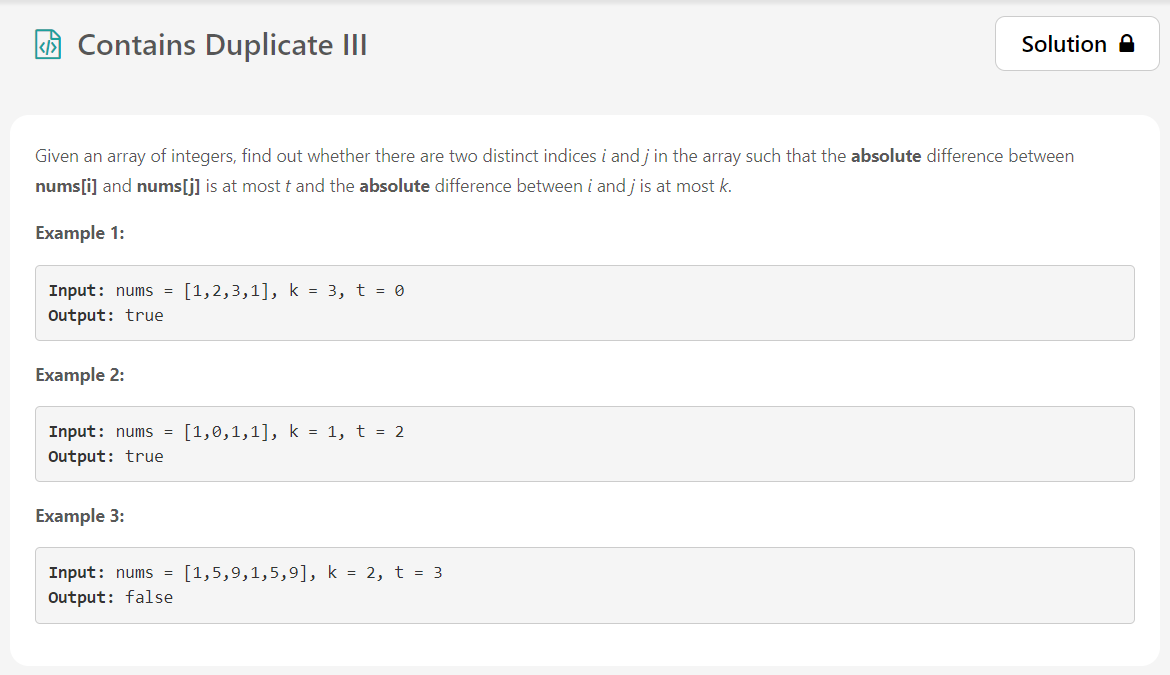

In [ ]:
''' September 2nd Contains Duplicate III

Hint #1  
Time complexity O(n logk) - This will give an indication that sorting is involved for k elements.

Hide Hint #2  
Use already existing state to evaluate next state - Like, a set of k sorted numbers are only needed to be tracked. 
When we are processing the next number in array, then we can utilize the existing sorted state and it is not necessary to sort next overlapping set of k numbers again.

'''
class Solution:
    def containsNearbyAlmostDuplicate(self, nums: List[int], k: int, t: int) -> bool:
        if k <= 0 or t < 0:
            return False
        
        mydic = {} # map from the dict to num in the dict
        
        for i, num in enumerate(nums):
            tmp = num // (t + 1)
            if tmp in mydic:
                return True
            if tmp + 1 in mydic and abs(num - mydic[tmp + 1]) <= t:
                return True
            if tmp - 1 in mydic and abs(num - mydic[tmp - 1]) <= t:
                return True
            
            mydic[tmp] = num
            if i - k >= 0:
                ex_tmp = nums[i - k] // (t + 1)
                del mydic[ex_tmp]
                
        return False



In [ ]:
''' September 3rd 
Repeated Substring Pattern

Given a non-empty string check if it can be constructed by taking a substring of it 
and appending multiple copies of the substring together.
 You may assume the given string consists of lowercase English letters only and its length will not exceed 10000.
 
Example 1:
Input: "abab"
Output: True
Explanation: It's the substring "ab" twice.

Example 2:
Input: "aba"
Output: False

Example 3:
Input: "abcabcabcabc"
Output: True

Explanation: It's the substring "abc" four times. (And the substring "abcabc" twice.)
'''

class Solution:
    def repeatedSubstringPattern(self, s: str) -> bool:
        s_len = len(s)
        # loop from the half length of the string to 1
        for i in range (s_len//2,0,-1):
            if s_len % i == 0:
                repeat_times = s_len // i
                # divisible
                sub_str = s[:i]
                # rebuild the string
                str_rebuild = "".join([sub_str]*repeat_times)   
                # print(str_rebuild)
                if str_rebuild == s:
                    return True 
        return False


### fastest submssion 

class Solution:
    def repeatedSubstringPattern(self, s: str) -> bool:
        ss = (s + s)[1:-1]
        print(ss)
        print(s)
        return ss.find(s) != -1

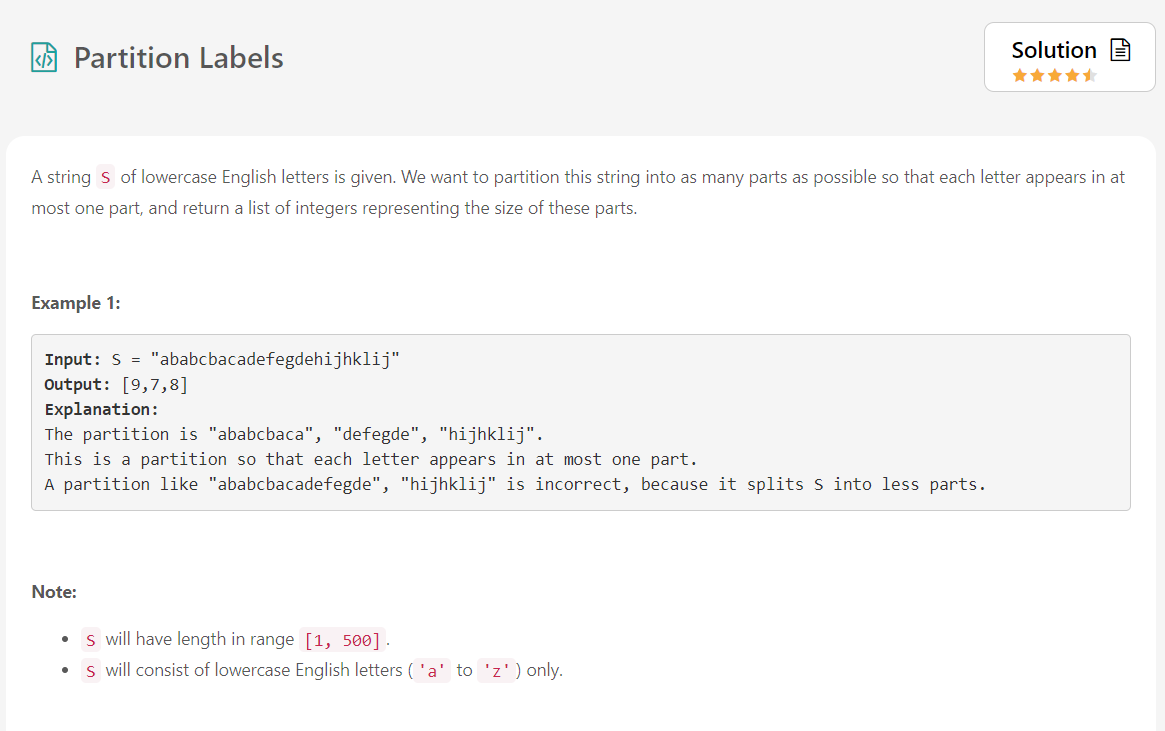

In [ ]:
''' Leetcode September  4th Partition Labels

# using the 2 pointer, figure the rightmost index first with the python dict, 
then use it to denote the start of the next section
# reset the left pointer at the start of each section 
# continue the search by updating the left pointer 
'''
class Solution:
    def partitionLabels(self, S: str) -> List[int]:
        if S is None or len(S) == 0: return None
        
        ret_arr = []
        # a dict last_occur store the right most character in the string 
        last_occur = {c:i for i,c in enumerate(S)}
    
        left, right = 0,0 
        for i, char in enumerate(S):
            
            right = max(right,last_occur[char]) # the longest substring
            
            if i == right:
                ret_arr += [right - left + 1]
                left = i + 1
        
        
        return ret_arr